<a href="https://colab.research.google.com/github/jeremy-08-ed/PraktikumML/blob/main/LaprakML_A2_24060119130071_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tugas Praktikum 6 Machine Learning
#### Nama: Jeremy Edbert Widjaja
#### NIM: 24060119130071
#### Kelas: A2


## Import Library dan Dataset

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

## Features and Target Selection

In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:, ['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

## PCA Model

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

## Plotting

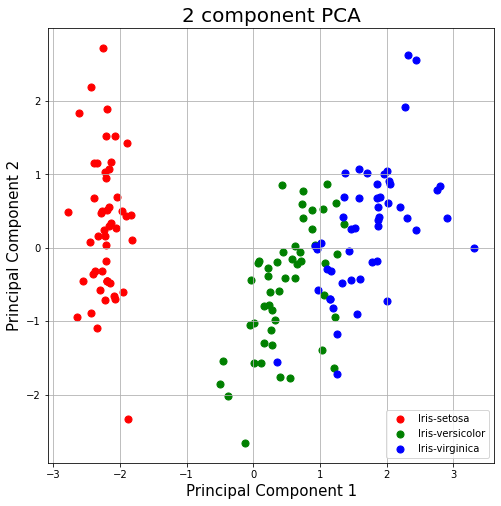

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
  indicesToKeep = finalDf['target'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
             finalDf.loc[indicesToKeep, 'principal component 2'],
             c=color,
             s=50)

ax.legend(targets)
ax.grid()


In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

# Breast Cancer Dataset

## Import Dataset

In [ ]:
url = "https://raw.githubusercontent.com/jeremy-08-ed/kumpulanDataset/main/breast-cancer-wisconsin.csv"
names = ['id', 'clump_thickness', 'uni_cell_size', 'uni_cell_shape', 'margin_adhesion', 'one_cell_size', 'bare_nuclei', 'bland_chromatin', 'nucleoli', 'mitoses', 'class']
df1 = pd.read_csv(url, names=names)

df1.head()

,id,clump_thickness,uni_cell_size,uni_cell_shape,margin_adhesion,one_cell_size,bare_nuclei,bland_chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data Preprocessing

In [ ]:
df1.drop(columns=['id'], axis=1, inplace=True)
df1.head()

,clump_thickness,uni_cell_size,uni_cell_shape,margin_adhesion,one_cell_size,bare_nuclei,bland_chromatin,nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
# Replace value '?' dengan angka 1
df1.replace('?', 1, inplace=True)

In [ ]:
# Mengubah tipe data menjadi int64
df1 = df1.astype(int)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   clump_thickness  699 non-null    int64
 1   uni_cell_size    699 non-null    int64
 2   uni_cell_shape   699 non-null    int64
 3   margin_adhesion  699 non-null    int64
 4   one_cell_size    699 non-null    int64
 5   bare_nuclei      699 non-null    int64
 6   bland_chromatin  699 non-null    int64
 7   nucleoli         699 non-null    int64
 8   mitoses          699 non-null    int64
 9   class            699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


## Features and Target Selection

In [ ]:
features = ['clump_thickness', 'uni_cell_size', 'uni_cell_shape', 'margin_adhesion', 'one_cell_size', 'bare_nuclei',	'bland_chromatin', 'nucleoli', 'mitoses']
# Separating out the features
x = df1.loc[:, features].values
# Separating out the target
y = df1.loc[:, ['class']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

## PCA Model

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df1[['class']]], axis = 1)

## Plotting

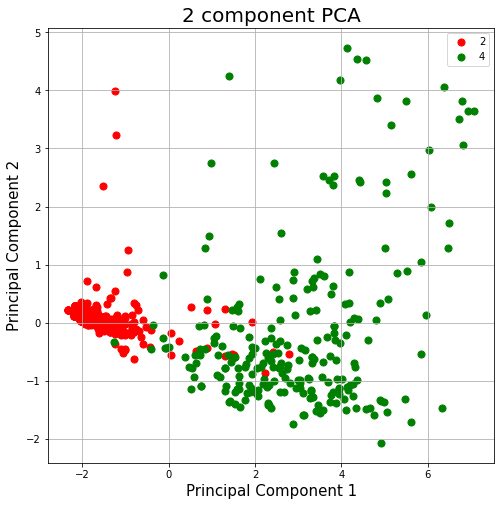

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = [2, 4]
colors = ['r', 'g']
for target, color in zip(targets, colors):
  indicesToKeep = finalDf['class'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
             finalDf.loc[indicesToKeep, 'principal component 2'],
             c=color,
             s=50)

ax.legend(targets)
ax.grid()


In [ ]:
pca.explained_variance_ratio_

array([0.65445704, 0.0860859 ])